In [0]:
!pip install catboost

     |████████████████████████████████| 60.6MB 1.3MB/s 


In [0]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation of Model
from sklearn import metrics as sm

# To supress warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#To perform kFold Cross Validation
from sklearn.model_selection import StratifiedKFold


from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
df=pd.read_csv("train.csv", encoding="ISO-8859-1")
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
#pdf = pd.concat([train, test], ignore_index=True)
df.shape

(233154, 41)

In [0]:
#df=df.dropna()
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
pd.set_option('display.max_columns', 111)

In [0]:
df.shape

(233154, 41)

In [0]:
#To check missing values
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
#Shape of data
df.shape

(233154, 41)

In [0]:
#to change the type and format of date of birth from object to datetime 
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%d-%m-%y', '%d/%m/%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

dob=[]
for i in df["Date.of.Birth"]:
    dob.append(try_parsing_date(i))

df["Date.of.Birth"]=dob


In [0]:
df["Date.of.Birth"].head()

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-12-09
Name: Date.of.Birth, dtype: datetime64[ns]

In [0]:
#calculating age and adding it as feature to data 
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year 

age=[]
for i in df["Date.of.Birth"]:
    if calculate_age(i)>0:
        age.append(calculate_age(i))
    else:
        v=calculate_age(i)+100
        age.append(v)

df["Age"]=age


In [0]:
#changing the format and type of CREDIT.HISTORY.LENGTH column from object to float
df["CREDIT.HISTORY.LENGTH"].head()

df["CREDIT.HISTORY.LENGTH"] =df["CREDIT.HISTORY.LENGTH"].str.replace("yrs",".")
df["CREDIT.HISTORY.LENGTH"] = df["CREDIT.HISTORY.LENGTH"].str.replace("mon","")

df["CREDIT.HISTORY.LENGTH"]= df["CREDIT.HISTORY.LENGTH"].str.replace(' ', '')

col=[]
for i in df["CREDIT.HISTORY.LENGTH"]:
    col.append(float(str(i)))
    

df["CREDIT.HISTORY.LENGTH"]=col


In [0]:
#changing the format and type of AVERAGE.ACCT.AGE column from object to float
df["AVERAGE.ACCT.AGE"].head()

df["AVERAGE.ACCT.AGE"] =df["AVERAGE.ACCT.AGE"].str.replace("yrs",".")
df["AVERAGE.ACCT.AGE"] = df["AVERAGE.ACCT.AGE"].str.replace("mon","")

df["AVERAGE.ACCT.AGE"]= df["AVERAGE.ACCT.AGE"].str.replace(' ', '')

col=[]
for i in df["AVERAGE.ACCT.AGE"]:
    col.append(float(str(i)))
    

df["AVERAGE.ACCT.AGE"]=col


In [0]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,35
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,1,34
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,34
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,1,26
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,1,42


In [0]:
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='No Bureau History Available') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Sufficient History Not Available') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Not Enough Info available on the customer') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: No Activity seen on the customer (Inactive)') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: Only a Guarantor') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: More than 50 active Accounts found') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 0 if (x=='Not Scored: No Updates available in last 36 months') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 1 if (x=='A-Very Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 1 if (x=='B-Very Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 1 if (x=='C-Very Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 1 if (x=='D-Very Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 2 if (x=='E-Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 2 if (x=='F-Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 2 if (x=='G-Low Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 3 if (x=='H-Medium Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 3 if (x=='I-Medium Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 4 if (x=='J-High Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 4 if (x=='K-High Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 5 if (x=='L-Very High Risk') else x )
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 5 if (x=='M-Very High Risk') else x )




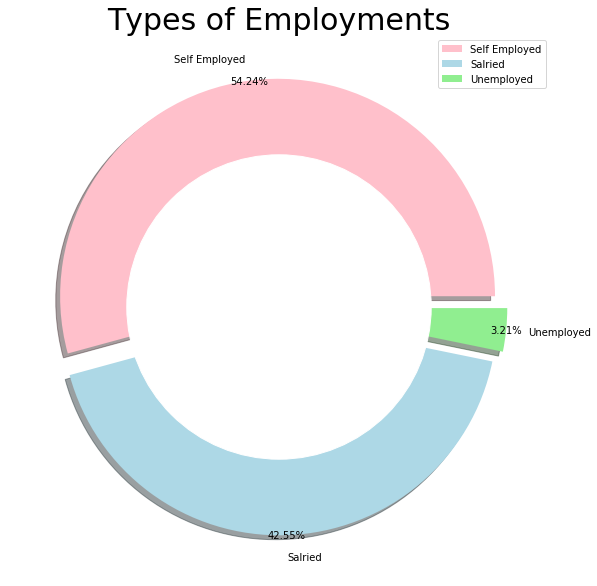

In [0]:
size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [0]:
#imputation of missing values in Employment.Type column by unemployed as it is only self employed and saried is mentioned so there will be obviously also unemployed applicants
df['Employment.Type']= df['Employment.Type'].replace(r'^\s*$', np.nan, regex=True)
df["Employment.Type"]=df["Employment.Type"].fillna("Unemployed")

In [0]:
# encodings for type of employments 

df['Employment.Type'] = df['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
df['Employment.Type'].value_counts()

2    127635
1     97858
0      7661
Name: Employment.Type, dtype: int64

In [0]:
df.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                 int64
DisbursalDate                                  object
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [0]:
#transformation categorical columns to integer
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

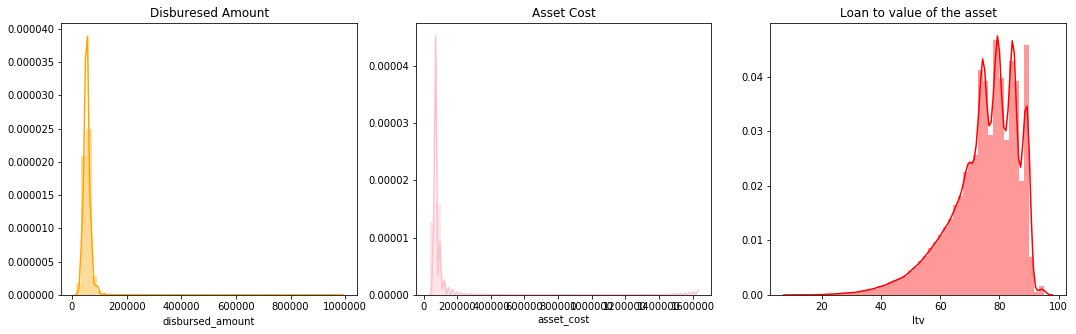

In [0]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(df['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of the asset')


#PRIMARY.INSTAL.AMT 

plt.show()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null datetime64[ns]
Employment.Type                        233154 non-null int64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag            

In [0]:
print("Minority Label percentage:",Loan_Default.value_counts()[1]/len(Loan_Default))
print("Majority Label percentage:",Loan_Default.value_counts()[0]/len(Loan_Default))

Data is skewed with the ration of 21.70/78.29

In [0]:
df.shape
len(df.index)

233154

In [0]:
for i in df.columns:
  print(i)
  j=df[i].nunique()
  print(j)
  k=len(df.index)
  if(j<2 or j==k):
    df=df.drop([i],axis=1)
print(df.columns)

UniqueID
233154
disbursed_amount
24565
asset_cost
46252
ltv
6579
branch_id
82
supplier_id
2953
manufacturer_id
11
Current_pincode_ID
6698
Date.of.Birth
15433
Employment.Type
3
DisbursalDate
84
State_ID
22
Employee_code_ID
3270
MobileNo_Avl_Flag
1
Aadhar_flag
2
PAN_flag
2
VoterID_flag
2
Driving_flag
2
Passport_flag
2
PERFORM_CNS.SCORE
573
PERFORM_CNS.SCORE.DESCRIPTION
6
PRI.NO.OF.ACCTS
108
PRI.ACTIVE.ACCTS
40
PRI.OVERDUE.ACCTS
22
PRI.CURRENT.BALANCE
71341
PRI.SANCTIONED.AMOUNT
44390
PRI.DISBURSED.AMOUNT
47909
SEC.NO.OF.ACCTS
37
SEC.ACTIVE.ACCTS
23
SEC.OVERDUE.ACCTS
9
SEC.CURRENT.BALANCE
3246
SEC.SANCTIONED.AMOUNT
2223
SEC.DISBURSED.AMOUNT
2553
PRIMARY.INSTAL.AMT
28067
SEC.INSTAL.AMT
1918
NEW.ACCTS.IN.LAST.SIX.MONTHS
26
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
14
AVERAGE.ACCT.AGE
178
CREDIT.HISTORY.LENGTH
272
NO.OF_INQUIRIES
25
loan_default
2
Age
48
Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
    

In [0]:
df['total_flags']=df['Aadhar_flag']+df['PAN_flag']+ df['VoterID_flag']+df['Driving_flag']+df['Passport_flag']

In [0]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'Age',
       'total_flags'],
      dtype='object')

In [0]:
df=df.drop(columns = ['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag','Passport_flag'])   #dropping theses cos we have made totalflags a new column

In [0]:
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate'])
df['disbursal_year'] = df['DisbursalDate'].dt.year


In [0]:
df['disbursal_year'].head() 

0    2018
1    2018
2    2018
3    2018
4    2018
Name: disbursal_year, dtype: int64

In [0]:
df['creditscoreavg']=df['PERFORM_CNS.SCORE']/df['Age']               #here we have a made a column such that we see what is his credit score for his age .. 
df['creditscoreavg']=df['creditscoreavg'].round(2)

In [0]:
#which quarter of the eyar was the loan taken can be important 

df['DisbursalDate_quarter'] = df['DisbursalDate'].dt.quarter
df['DisbursalDate_quarter'].head()

0    1
1    3
2    1
3    4
4    3
Name: DisbursalDate_quarter, dtype: int64

In [0]:
#as we have derieved the above columns we shall drop
df=df.drop(columns=['DisbursalDate'])

In [0]:
c = df.corr()

s = c.unstack()


so = s.sort_values(kind="quicksort")
so

ltv                            asset_cost                            -0.301188
asset_cost                     ltv                                   -0.301188
Current_pincode_ID             ltv                                   -0.300112
ltv                            Current_pincode_ID                    -0.300112
PERFORM_CNS.SCORE              Current_pincode_ID                    -0.161664
Current_pincode_ID             PERFORM_CNS.SCORE                     -0.161664
                               creditscoreavg                        -0.152266
creditscoreavg                 Current_pincode_ID                    -0.152266
Age                            asset_cost                            -0.118342
asset_cost                     Age                                   -0.118342
Current_pincode_ID             PRI.ACTIVE.ACCTS                      -0.117882
PRI.ACTIVE.ACCTS               Current_pincode_ID                    -0.117882
PERFORM_CNS.SCORE.DESCRIPTION  Current_pincode_ID   

In [0]:
df[df.columns[1:]].corr()['loan_default'][:]    #finding corr of all features with target 

asset_cost                             0.014261
ltv                                    0.098208
branch_id                              0.030193
supplier_id                            0.027357
manufacturer_id                       -0.025039
Current_pincode_ID                     0.028419
Employment.Type                        0.025377
State_ID                               0.048075
Employee_code_ID                       0.020657
PERFORM_CNS.SCORE                     -0.057929
PERFORM_CNS.SCORE.DESCRIPTION          0.029370
PRI.NO.OF.ACCTS                       -0.035456
PRI.ACTIVE.ACCTS                      -0.041451
PRI.OVERDUE.ACCTS                      0.040872
PRI.CURRENT.BALANCE                   -0.027386
PRI.SANCTIONED.AMOUNT                 -0.011304
PRI.DISBURSED.AMOUNT                  -0.011155
SEC.NO.OF.ACCTS                       -0.008385
SEC.ACTIVE.ACCTS                      -0.005993
SEC.OVERDUE.ACCTS                     -0.001371
SEC.CURRENT.BALANCE                   -0

In [0]:
df=df.drop(['disbursal_year'],axis=1)

In [0]:
c = df.corr()

s = c.unstack()


so = s.sort_values(kind="quicksort")
so

ltv                                  asset_cost                            -0.301188
asset_cost                           ltv                                   -0.301188
Current_pincode_ID                   ltv                                   -0.300112
ltv                                  Current_pincode_ID                    -0.300112
PERFORM_CNS.SCORE                    Current_pincode_ID                    -0.161664
Current_pincode_ID                   PERFORM_CNS.SCORE                     -0.161664
                                     creditscoreavg                        -0.152266
creditscoreavg                       Current_pincode_ID                    -0.152266
Age                                  asset_cost                            -0.118342
asset_cost                           Age                                   -0.118342
Current_pincode_ID                   PRI.ACTIVE.ACCTS                      -0.117882
PRI.ACTIVE.ACCTS                     Current_pincode_ID          

In [0]:
d=df.copy()


In [0]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,State_ID,Employee_code_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,total_flags,creditscoreavg,DisbursalDate_quarter
0,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,35,1,0.00,1
1,47145,65550,73.23,67,22807,45,1502,1985-07-31,2,6,1998,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,1,34,1,17.59,3
2,53278,61360,89.63,67,22807,45,1497,1985-08-24,2,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,34,1,0.00,1
3,57513,66113,88.48,67,22807,45,1501,1993-12-30,2,6,1998,305,5,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,1,26,1,11.73,4
4,52378,60300,88.39,67,22807,45,1495,1977-12-09,2,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,1,42,1,0.00,3


In [0]:
df.columns
df=df.drop(columns=['Date.of.Birth'])



In [0]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'total_flags', 'creditscoreavg',
       'DisbursalDate_quarter'],
      dtype='object')

In [0]:
df.shape

(233154, 36)

In [0]:
datat=df.copy()

In [0]:
X=df.drop(columns=['loan_default'])
Y=df['loan_default']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score

model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)

print("Training Accuracy: ", model_ada.score(X_train, y_train))
print('Testing Accuarcy: ', model_ada.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("roc_auc_score: ",roc_auc_score(y_test,y_pred))

Training Accuracy:  0.7827399301962761
Testing Accuarcy:  0.7827410949797345
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36508
           1       0.48      0.01      0.02     10123

   micro avg       0.78      0.78      0.78     46631
   macro avg       0.63      0.50      0.45     46631
weighted avg       0.72      0.78      0.69     46631

roc_auc_score:  0.5040312689040395


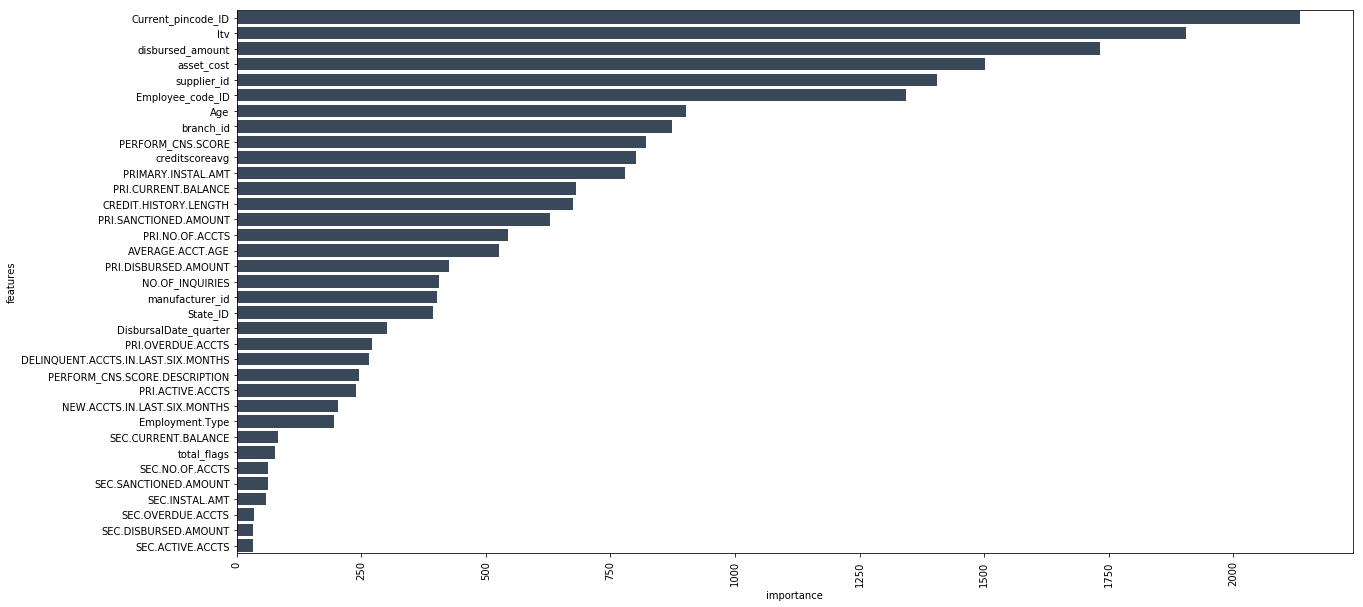

In [0]:
#Feature selection
from sklearn import model_selection, preprocessing
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(X, Y, feature_names=X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
import seaborn as sn
sn.barplot(data=features.head(140),x="importance",y="features",ax=ax,orient="h",color="#34495e")

In [0]:
topFeatures = features["features"].tolist()[:40]
topFeatures   #we will take all the features for building the modek else the roc value falls 

['Current_pincode_ID',
 'ltv',
 'disbursed_amount',
 'asset_cost',
 'supplier_id',
 'Employee_code_ID',
 'Age',
 'branch_id',
 'PERFORM_CNS.SCORE',
 'creditscoreavg',
 'PRIMARY.INSTAL.AMT',
 'PRI.CURRENT.BALANCE',
 'CREDIT.HISTORY.LENGTH',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.NO.OF.ACCTS',
 'AVERAGE.ACCT.AGE',
 'PRI.DISBURSED.AMOUNT',
 'NO.OF_INQUIRIES',
 'manufacturer_id',
 'State_ID',
 'DisbursalDate_quarter',
 'PRI.OVERDUE.ACCTS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.ACTIVE.ACCTS',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'Employment.Type',
 'SEC.CURRENT.BALANCE',
 'total_flags',
 'SEC.NO.OF.ACCTS',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.INSTAL.AMT',
 'SEC.OVERDUE.ACCTS',
 'SEC.DISBURSED.AMOUNT',
 'SEC.ACTIVE.ACCTS']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

In [0]:
# Decision Tree Classifier with startified k fold
from sklearn.metrics import confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=DecisionTreeClassifier(random_state=42)
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  

roc_auc_score:  0.5296474916726416
roc_auc_score:  0.5348296027727715
roc_auc_score:  0.5330503424937153
roc_auc_score:  0.5354280560937337
roc_auc_score:  0.5289639653900091
roc_auc_score:  0.5288475691372755
roc_auc_score:  0.524299435253081
roc_auc_score:  0.5277620006796494
roc_auc_score:  0.5287308224743468
roc_auc_score:  0.5267484563110238
final roc_auc_score: 0.5298307742278248


In [0]:
# Random Forest Classifier
from sklearn.metrics import confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
    m.fit(X_trainn,y_trainn)
    predstest=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,predstest))
    auc.append(roc_auc_score(y_testt,predstest))
print("final roc_auc_score:",np.mean(auc))  


roc_auc_score:  0.5624981101474076
roc_auc_score:  0.5685540941597451
roc_auc_score:  0.5680477574121288
roc_auc_score:  0.5755929706345149
roc_auc_score:  0.5710420195659863
roc_auc_score:  0.5772551413303176
roc_auc_score:  0.5650844690039315
roc_auc_score:  0.5731704631683773
roc_auc_score:  0.5700709898664496
roc_auc_score:  0.5648606758614492
final roc_auc_score: 0.5696176691150308


In [0]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
#defualt values 

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=XGBClassifier()
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))

roc_auc_score:  0.6562463830673537
roc_auc_score:  0.6575181650770934
roc_auc_score:  0.653062602944118
roc_auc_score:  0.6582006766737701
roc_auc_score:  0.6464859751121887
roc_auc_score:  0.6612117106769202
roc_auc_score:  0.65342924677731
roc_auc_score:  0.6555100450894741
roc_auc_score:  0.6595541325094552
roc_auc_score:  0.6526739727258382
final roc_auc_score: 0.6553892910653522


In [0]:
#Tunning
#Round 1: Tune max_depth and min_child_weight
from sklearn.model_selection import GridSearchCV

# Define a new XGBoost Classifier with default parameters
select_xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, seed=None)

#here i m fixing 2 parameters learning rate and nestimators

# Set a list of parameters
param_grid = {
    
            'max_depth':[3,4,5],
            'min_child_weight':[3,4,5]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5,scoring='roc_auc' )
# Train the model
grid_clf.fit(X_trainn,y_trainn)
print(grid_clf.best_params_, grid_clf.best_score_)

{'max_depth': 5, 'min_child_weight': 5} 0.6616494080056438


In [0]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,total_flags,creditscoreavg,DisbursalDate_quarter
0,50578,58400,89.55,67,22807,45,1441,1,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,35,1,0.00,1
1,47145,65550,73.23,67,22807,45,1502,2,6,1998,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,1,34,1,17.59,3
2,53278,61360,89.63,67,22807,45,1497,2,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,34,1,0.00,1
3,57513,66113,88.48,67,22807,45,1501,2,6,1998,305,5,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,1,26,1,11.73,4
4,52378,60300,88.39,67,22807,45,1495,2,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,1,42,1,0.00,3


In [0]:
#Tune subsample and colsample_bytree
# Define a new XGBoost Classifier setting the best value for the above parameter and 
# default for the rest

select_xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth=5, 
                                   min_child_weight= 5,seed=None)

# Set a list of parameters
param_grid = {
    
            'subsample':[0.6,0.7,0.8,0.9],
            'colsample_bytree':[0.6,0.7,0.8,0.9]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')
grid_clf.fit(X_trainn,y_trainn)
print( grid_clf.best_params_, grid_clf.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.9} 0.663128304863448


In [0]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)

#with parameter tunning done below 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=XGBClassifier(learning_rate=0.1, n_estimators=100, seed=None,max_depth=5,min_child_weight= 5,colsample_bytree= 0.6,subsample=0.9)   
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  
#0.667

roc_auc_score:  0.6648941202263507
roc_auc_score:  0.6629870179725912
roc_auc_score:  0.6617473676847823
roc_auc_score:  0.6661451772754452
roc_auc_score:  0.6573095625560318
roc_auc_score:  0.6673583803501945
roc_auc_score:  0.6595031923106839
roc_auc_score:  0.6656219562093452
roc_auc_score:  0.6674844260844123
roc_auc_score:  0.6614659811225101
final roc_auc_score: 0.6634517181792347


final roc_auc_score with tunning : 0.6614659811225101


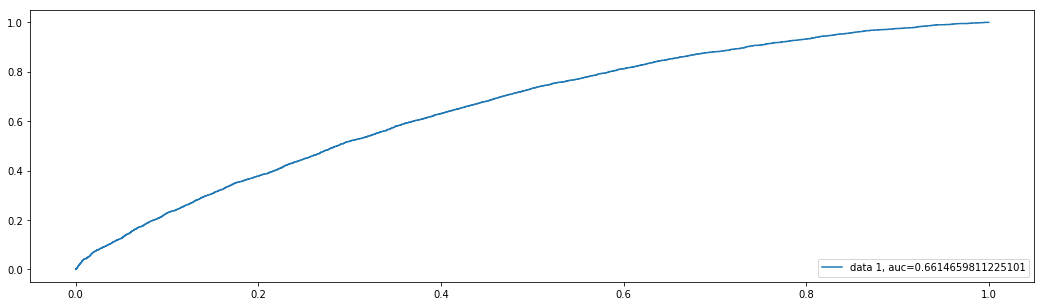

In [0]:
print("final roc_auc_score with tunning :",np.mean(auc))
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_testt,preds)
auc = roc_auc_score(y_testt,preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
#Catboost
#default parameters 
import catboost
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    #print(X_test.isnull().sum())
    categorical_features_indices = np.where(X_trainn.dtypes =='object')[0]
    m=catboost.CatBoostClassifier(n_estimators=40,cat_features=categorical_features_indices)
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))   

Learning rate set to 0.5
0:	learn: 0.5535755	total: 196ms	remaining: 7.63s
1:	learn: 0.5195546	total: 323ms	remaining: 6.15s
2:	learn: 0.5089976	total: 470ms	remaining: 5.79s
3:	learn: 0.5049159	total: 601ms	remaining: 5.41s
4:	learn: 0.5024197	total: 736ms	remaining: 5.15s
5:	learn: 0.5013012	total: 865ms	remaining: 4.9s
6:	learn: 0.5001868	total: 992ms	remaining: 4.68s
7:	learn: 0.4991696	total: 1.12s	remaining: 4.5s
8:	learn: 0.4986050	total: 1.26s	remaining: 4.34s
9:	learn: 0.4979646	total: 1.4s	remaining: 4.2s
10:	learn: 0.4974443	total: 1.53s	remaining: 4.03s
11:	learn: 0.4970437	total: 1.65s	remaining: 3.86s
12:	learn: 0.4965057	total: 1.79s	remaining: 3.73s
13:	learn: 0.4961967	total: 1.92s	remaining: 3.56s
14:	learn: 0.4960036	total: 2.04s	remaining: 3.4s
15:	learn: 0.4957334	total: 2.18s	remaining: 3.27s
16:	learn: 0.4954353	total: 2.32s	remaining: 3.13s
17:	learn: 0.4948382	total: 2.46s	remaining: 3.01s
18:	learn: 0.4945272	total: 2.59s	remaining: 2.86s
19:	learn: 0.4943322	

In [0]:
pred=m.predict_proba(X_test)[:,-1]


array([0.23836499, 0.20566324, 0.14961299, ..., 0.18659163, 0.24867946,
       0.27125478])

final roc_auc_score without tunning : 0.6573321473595893


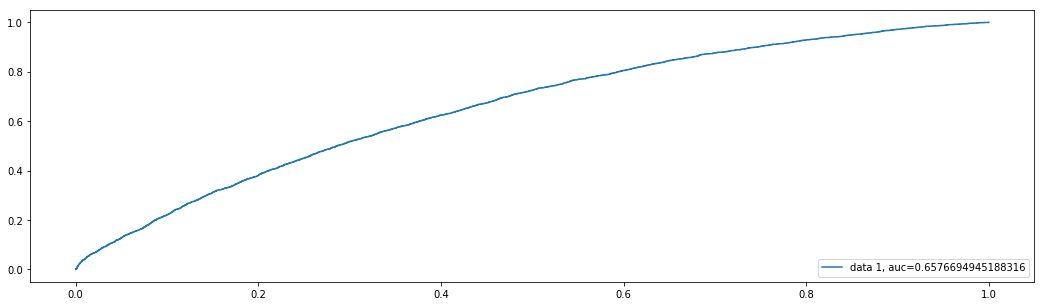

In [0]:
print("final roc_auc_score without tunning :",np.mean(auc))
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_testt,preds)
auc = roc_auc_score(y_testt,preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
select_catboost_clf =catboost.CatBoostClassifier(n_estimators=40,learning_rate=0.01,thread_count=4,depth=4)

# Set a list of parameters
param_grid = {
    
            'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
}
grid_clf = GridSearchCV(select_catboost_clf,param_grid,cv=5, scoring='roc_auc')
grid_clf.fit(X_trainn,y_trainn)
print( grid_clf.best_params_, grid_clf.best_score_)

In [0]:
#Catboost
# parameters tunning one 
import catboost
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    #print(X_test.isnull().sum())
    categorical_features_indices = np.where(X_trainn.dtypes =='object')[0]
    m=catboost.CatBoostClassifier(learning_rate = 0.03998,iterations = 1497, l2_leaf_reg = 49.97,scale_pos_weight = 2.207,eval_metric='AUC',
                            silent = True,cat_features=categorical_features_indices)
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))   
#  m=catboost.CatBoostClassifier(learning_rate = 0.03185,iterations = 1000, l2_leaf_reg = 999.6,scale_pos_weight = 1.915,eval_metric='AUC',
                            #silent = True,cat_features=categorical_features_indices) 0.6656 roc

roc_auc_score:  0.6709306307240549
roc_auc_score:  0.6672546602665688
roc_auc_score:  0.6663149511472682
roc_auc_score:  0.6712432047327117
roc_auc_score:  0.6622855993942731
roc_auc_score:  0.6700142828519505
roc_auc_score:  0.6644452035190974
roc_auc_score:  0.6700553973598804
roc_auc_score:  0.6710476389062943
roc_auc_score:  0.6682187576379212
final roc_auc_score: 0.6681810326540021


final roc_auc_score with tunning : 0.6682187576379212


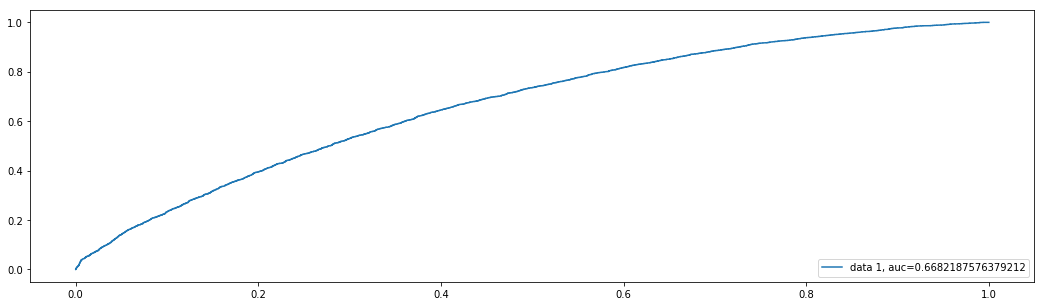

In [0]:
print("final roc_auc_score with tunning :",np.mean(auc))
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_testt,preds)
auc = roc_auc_score(y_testt,preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()